# HOMEWORK 5: Convolution Networks, Non-Linear Regression, Model Tuning, and Tree Regression

### Importing Libraries 

In [1]:
import matplotlib.pyplot as plt
import autograd.numpy as np
from autograd import grad, value_and_grad
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D
from sklearn.tree import DecisionTreeRegressor

## Exercise 1 – Convolution Networks: Vertical and Horizontal Art

In [45]:
def generate_stripe_image(size, stripe_nr, vertical = True):
  img=np.zeros((size,size,1),dtype="uint8")
  for i in range(0,stripe_nr):
    x,y = np.random.randint(0,size,2)
    l  = np.int(np.random.randint(y,size,1))
    if (vertical):
      img[y:l,x,0]=255
    else:
      img[x,y:l,0]=255
  return img  

/var/folders/61/2bknw8113b177snmp62m49p80000gn/T/ipykernel_74627/3122965970.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  l  = np.int(np.random.randint(y,size,1))


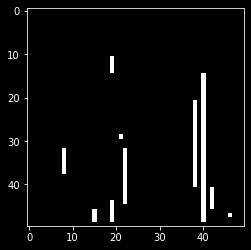

In [46]:
import numpy as np
img=generate_stripe_image(50,10, vertical=True)
plt.imshow(img[:,:,0],cmap='gray')

### 1.1 – Creating Training and Validation Images

In [55]:
def generate_stripe_dataset(max_its_H, max_its_V,size, stripe_nr):
    ''' 

    Use this to generate a set of vertical and horizontal striped images 

    Parameters
    -------------

    max_its_H : int 
    number of images with horizontal stripes

    max_its_V : int 
    number of images with vertical stripes
    
    size : int
    dimensions of image 
    
    stripe_nr : int 
    number of stripes per image
    

    Return
    -------------

    data : array
    contains set of vertical and horizontal striped images 

    '''
    data = [] # container for our images
    
    for i in range(max_its_H): # generate horizontal stripe images
        d_H = generate_stripe_image(size, stripe_nr, vertical = False)
        data.append(d_H)
    
    for i in range(max_its_V): # generate vertical stripe images 
        d_V = generate_stripe_image(size, stripe_nr, vertical = True)
        data.append(d_V)
    
    data = np.array(data) # convert list into array 
    
    return data/255 # normalize the two sets

/var/folders/61/2bknw8113b177snmp62m49p80000gn/T/ipykernel_74627/3122965970.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  l  = np.int(np.random.randint(y,size,1))


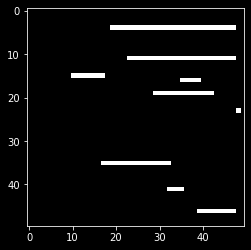

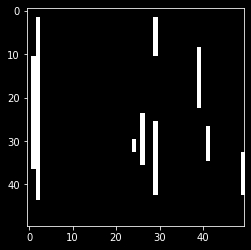

In [56]:
# Create our images 
X_train = generate_stripe_dataset(500, 500,50, 10)
X_val = generate_stripe_dataset(500, 500,50, 10)

# Ensure we have 500 horizontal and 500 vertical
plt.imshow(X_train[499][:,:,0],cmap='gray')
plt.show()
plt.imshow(X_train[500][:,:,0],cmap='gray')
plt.show()

### 1.2 – Creating Training and Validation Labels 

In [57]:
def generate_stripe_labels(max_its_H, max_its_V):
    ''' 

    Use this to generate a set of labels for our vertical (0) and horizontal (+1) striped images 

    Parameters
    -------------

    max_its_H : int 
    number of images with horizontal stripes

    max_its_V : int 
    number of images with vertical stripes
    

    Return
    -------------

    labels : array
    contains set of labels for our vertical and horizontal striped images 

    '''
    labels = [] # container for labels
    
    for i in range(max_its_H): # +1 for images with horizontal stripes
        labels.append(1)
    
    for i in range(max_its_V): # 0 for images with vertical stripes 
        labels.append(0)
    
    return np.array(labels) 

In [58]:
# create training and validation labels 
Y_train_labels = generate_stripe_labels(500, 500)
Y_val_labels = generate_stripe_labels(500, 500)

# convert labels to one-hot encoding 
Y_train=to_categorical(Y_train_labels,2)
Y_val=to_categorical(Y_val_labels,2)

# reshape labels to properly run our convolution network
Y_train = Y_train.reshape(1000,1,1,2)
Y_val = Y_val.reshape(1000,1,1,2)

### 1.3 – Creating our Convolution Network 

In [59]:
# create our convolution network
model = models.Sequential([
    layers.Conv2D(1,(5,5),activation = 'linear', padding = 'same',input_shape = (50, 50, 1)),
    layers.MaxPool2D(pool_size=50),
    layers.Dense(2, activation='softmax')])

# define our loss function, optimizer, and metrics
model.compile(loss="categorical_crossentropy",
    optimizer= "adam",
    metrics=["accuracy"])

# access history 
history=model.fit(X_train, Y_train,
                  validation_data=(X_val,Y_val),
                  batch_size=64, 
                  epochs=50,
                  verbose=1,
                  shuffle=True) 

Epoch 1/50
16/16 [==============================] - 4s 162ms/step - loss: 0.7242 - accuracy: 0.5179 - val_loss: 0.7136 - val_accuracy: 0.5000
Epoch 2/50
16/16 [==============================] - 2s 148ms/step - loss: 0.7206 - accuracy: 0.4774 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 3/50
16/16 [==============================] - 2s 129ms/step - loss: 0.6890 - accuracy: 0.5124 - val_loss: 0.6799 - val_accuracy: 0.5000
Epoch 4/50
16/16 [==============================] - 2s 137ms/step - loss: 0.6759 - accuracy: 0.5076 - val_loss: 0.6665 - val_accuracy: 0.5000
Epoch 5/50
16/16 [==============================] - 3s 215ms/step - loss: 0.6729 - accuracy: 0.4712 - val_loss: 0.6541 - val_accuracy: 0.5000
Epoch 6/50
16/16 [==============================] - 2s 149ms/step - loss: 0.6520 - accuracy: 0.5013 - val_loss: 0.6434 - val_accuracy: 0.5000
Epoch 7/50
16/16 [==============================] - 2s 114ms/step - loss: 0.6481 - accuracy: 0.4736 - val_loss: 0.6289 - val_accuracy: 0.5000
Epoch 

In [60]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 50, 50, 1)         26        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 1)           0         
_________________________________________________________________
dense_3 (Dense)              (None, 1, 1, 2)           4         
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


#### How many parameters do we have?
There are a total of 30 parameters. 26 parameters from from the Conv2D layer and 4 come from the Dense layer. 

### 1.4 – Plotting Model and Validation Accuracy 

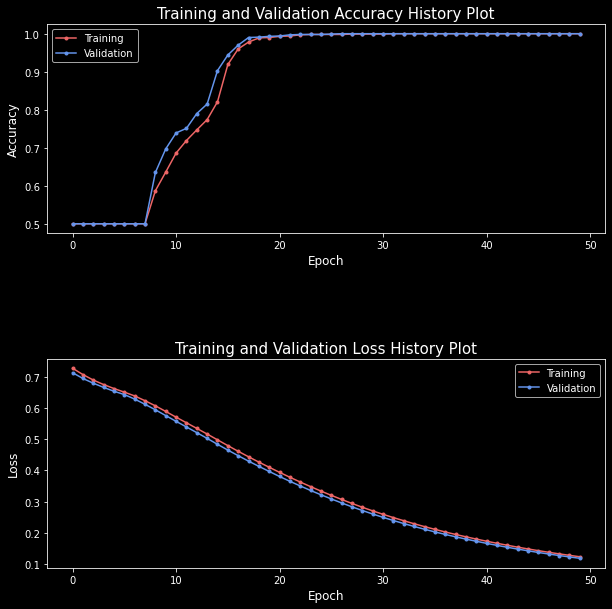

In [61]:
# initialize epoch steps 
epoch_num = np.arange(0,len(history.history['accuracy']))

# set the size and titles of the plot and the axis
fig, (ax1,ax2) = plt.subplots(2,figsize=(10, 10))
plt.subplots_adjust(hspace = 0.6)

# training & validation accuracy history
ax1.set_title("Training and Validation Accuracy History Plot", fontsize = 15) 
ax1.set_xlabel('Epoch', fontsize = 12) # set x-axis title to the kth step in the algorithm
ax1.set_ylabel('Accuracy', fontsize = 12) # set y-axis title to the value of the cost function at the kth step
ax1.plot(epoch_num,history.history['accuracy'], color='#EE6666', marker = '.', label = 'Training')
ax1.plot(epoch_num,history.history['val_accuracy'], color='cornflowerblue', marker = '.', label = 'Validation')
plt.style.use("dark_background")
ax1.legend()

# training & validation loss history
ax2.set_title("Training and Validation Loss History Plot", fontsize = 15) 
ax2.set_xlabel('Epoch', fontsize = 12) # set x-axis title to the kth step in the algorithm
ax2.set_ylabel('Loss', fontsize = 12) # set y-axis title to the value of the cost function at the kth step
ax2.plot(epoch_num,history.history['loss'], color='#EE6666', marker = '.', label = 'Training')
ax2.plot(epoch_num,history.history['val_loss'], color='cornflowerblue', marker = '.', label = 'Validation')
plt.style.use("dark_background")
ax2.legend()

plt.show()

#### Observations from the accuracy and loss history plots 
The model and validation start at 50% accuracy and then there is a rapid increase in accuracy for both model and validation within the first 10 epochs but then the accuracy plateaud and did not change significantly from the 20th epoch all up until the last epoch. The loss history decreased gradually throughout the epochs for both model and validation. Both model and validation reached 100% accuracy at the last epoch and had similar loss where both reached > 10% at the final epoch.  

### 1.5 – Obtaining Our Trained Kernel

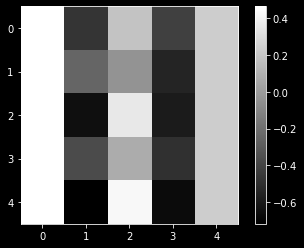

In [62]:
conv_filter=model.get_weights()[0] # extract trained kernel 
img = conv_filter[:,:,0,0] # reshape into 5x5 image
plt.imshow(img,cmap='gray',interpolation = 'nearest') 
plt.colorbar()

#### Observations from kernel plot
The kernel plot showcases a 5x5 image containing squares of different values. Graphically, we can see that the squares creates vertical columns, for example in the left-most part of the image from (0,0) --> (0,4) there is a white vertical column. There are also other vertical columns at the right-most end of the image and in the center. These vertical/horizontal patterns show that it is reasonable to assume that the kernel is able to distinguish between vertical and horizontal stripes as the kernel itself, which is a 5x5 matrix that "scans" the 50x50 image, contains these vertical and horizontal patterns. If the kernel plot had no pattern of distinct columns or rows then it would not be able to distinguish as it scans over the data.  

### 1.6 – Experimenting With Hyperparameters 

### ReLu Activation vs. Linear Activation 

In [63]:
# create our convolution network
model_relu = models.Sequential([
    layers.Conv2D(1,(5,5),activation = 'relu', padding = 'same',input_shape = (50, 50, 1)),
    layers.MaxPool2D(pool_size=50),
    layers.Dense(2, activation='softmax')])

# define our loss function, optimizer, and metrics
model_relu.compile(loss="categorical_crossentropy",
    optimizer= "adam",
    metrics=["accuracy"])

# access history 
history_relu=model_relu.fit(X_train, Y_train,
                  validation_data=(X_val,Y_val),
                  batch_size=64, 
                  epochs=50,
                  verbose=1,
                  shuffle=True) 

Epoch 1/50
16/16 [==============================] - 6s 217ms/step - loss: 0.6926 - accuracy: 0.5045 - val_loss: 0.6853 - val_accuracy: 0.5000
Epoch 2/50
16/16 [==============================] - 3s 170ms/step - loss: 0.6775 - accuracy: 0.5121 - val_loss: 0.6756 - val_accuracy: 0.5000
Epoch 3/50
16/16 [==============================] - 3s 176ms/step - loss: 0.6722 - accuracy: 0.4967 - val_loss: 0.6659 - val_accuracy: 0.5000
Epoch 4/50
16/16 [==============================] - 2s 134ms/step - loss: 0.6638 - accuracy: 0.4912 - val_loss: 0.6551 - val_accuracy: 0.5000
Epoch 5/50
16/16 [==============================] - 2s 102ms/step - loss: 0.6525 - accuracy: 0.4832 - val_loss: 0.6423 - val_accuracy: 0.5000
Epoch 6/50
16/16 [==============================] - 2s 127ms/step - loss: 0.6296 - accuracy: 0.5226 - val_loss: 0.6272 - val_accuracy: 0.5000
Epoch 7/50
16/16 [==============================] - 4s 248ms/step - loss: 0.6190 - accuracy: 0.5146 - val_loss: 0.6100 - val_accuracy: 0.5000
Epoch 

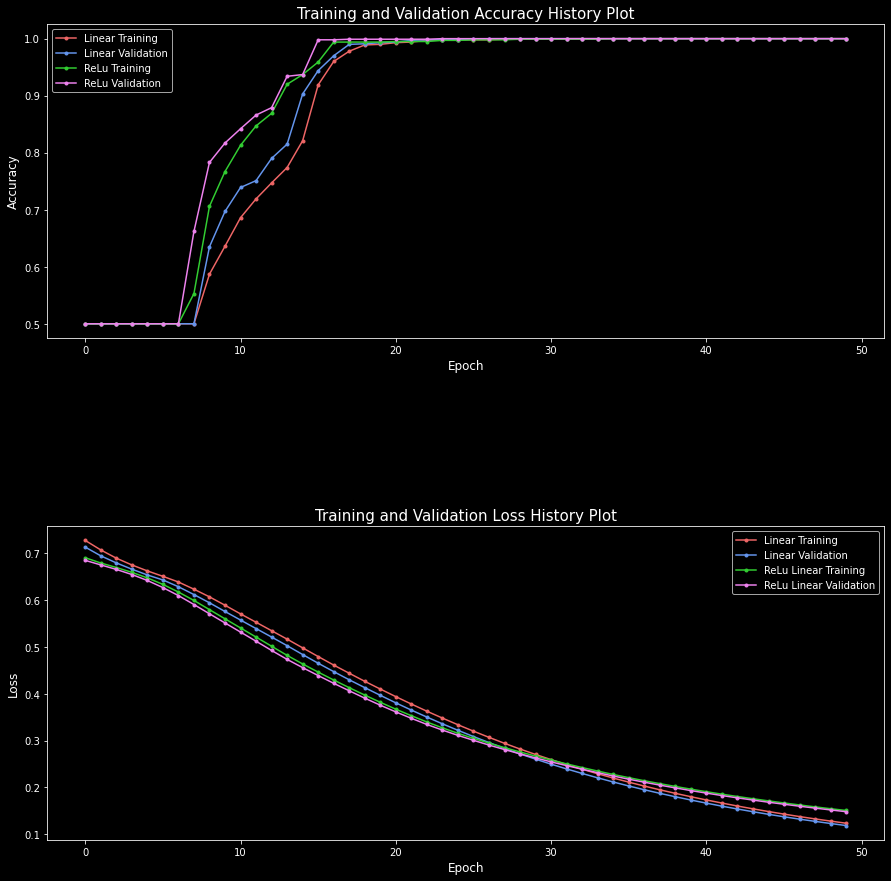

In [64]:
# initialize epoch steps 
epoch_num = np.arange(0,len(history.history['accuracy']))

# set the size and titles of the plot and the axis
fig, (ax1,ax2) = plt.subplots(2,figsize=(15, 15))
plt.subplots_adjust(hspace = 0.6)

# training & validation accuracy history
ax1.set_title("Training and Validation Accuracy History Plot", fontsize = 15) 
ax1.set_xlabel('Epoch', fontsize = 12) # set x-axis title to the kth step in the algorithm
ax1.set_ylabel('Accuracy', fontsize = 12) # set y-axis title to the value of the cost function at the kth step
ax1.plot(epoch_num,history.history['accuracy'], color='#EE6666', marker = '.', label = 'Linear Training')
ax1.plot(epoch_num,history.history['val_accuracy'], color='cornflowerblue', marker = '.', label = 'Linear Validation')
ax1.plot(epoch_num,history_relu.history['accuracy'], color='limegreen', marker = '.', label = 'ReLu Training')
ax1.plot(epoch_num,history_relu.history['val_accuracy'], color='violet', marker = '.', label = 'ReLu Validation')
plt.style.use("dark_background")
ax1.legend()

# training & validation loss history
ax2.set_title("Training and Validation Loss History Plot", fontsize = 15) 
ax2.set_xlabel('Epoch', fontsize = 12) # set x-axis title to the kth step in the algorithm
ax2.set_ylabel('Loss', fontsize = 12) # set y-axis title to the value of the cost function at the kth step
ax2.plot(epoch_num,history.history['loss'], color='#EE6666', marker = '.', label = 'Linear Training')
ax2.plot(epoch_num,history.history['val_loss'], color='cornflowerblue', marker = '.', label = 'Linear Validation')
ax2.plot(epoch_num,history_relu.history['loss'], color='limegreen', marker = '.', label = 'ReLu Linear Training')
ax2.plot(epoch_num,history_relu.history['val_loss'], color='violet', marker = '.', label = 'ReLu Linear Validation')
plt.style.use("dark_background")
ax2.legend()

plt.show()

#### Observations from plot
The model and validation start at 50% accuracy and then there is a rapid increase in accuracy for both model and validation within the first 10 epochs but then the accuracy plateaud and did not change significantly from the 20th epoch all up until the last epoch for both ReLu and linear. However, the ReLu does increase to 100% accuracy in fewer epochs than the linear. The loss history decreased gradually throughout the epochs for both model and validation of ReLu and linear. However, ReLu does not reach as low of a loss value than linear (ReLu is around 20% whereas linear is closer to 10%).

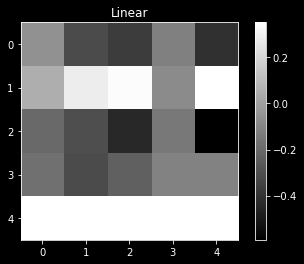

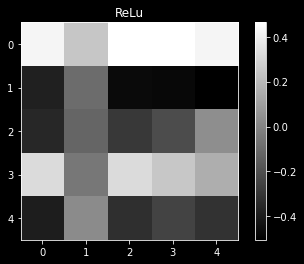

In [33]:
plt.imshow(img,cmap='gray',interpolation = 'nearest')
plt.title(label = 'Linear')
plt.colorbar()
plt.show()

conv_filter_relu=model_relu.get_weights()[0] # extract trained kernel 
img_relu = conv_filter_relu[:,:,0,0] # reshape into 5x5 image
plt.imshow(img_relu,cmap='gray',interpolation = 'nearest')
plt.title(label = 'ReLu')
plt.colorbar()
plt.show()

#### Observations from kernel plot
Both kernel plots indicate distinct columnar and row-oriented patterns which indicate that ReLu is able to distinguish between vertical and horizontal stripes. It appears that ReLu have a greater greyscale range with values on the further ends of the black and white spectrum which could indicate a greater degree of distinction. 

### Average Pooling vs. Max Pooling 

In [34]:
# create our convolution network
model_avg = models.Sequential([
    layers.Conv2D(1,(5,5),activation = 'linear', padding = 'same',input_shape = (50, 50, 1)),
    layers.AveragePooling2D(pool_size=50),
    layers.Dense(2, activation='softmax')])

# define our loss function, optimizer, and metrics
model_avg.compile(loss="categorical_crossentropy",
    optimizer= "adam",
    metrics=["accuracy"])

# access history 
history_avg=model_avg.fit(X_train, Y_train,
                  validation_data=(X_val,Y_val),
                  batch_size=64, 
                  epochs=50,
                  verbose=1,
                  shuffle=True)

Epoch 1/50
16/16 [==============================] - 1s 64ms/step - loss: 0.6942 - accuracy: 0.4830 - val_loss: 0.6937 - val_accuracy: 0.4560
Epoch 2/50
16/16 [==============================] - 1s 76ms/step - loss: 0.6936 - accuracy: 0.4807 - val_loss: 0.6937 - val_accuracy: 0.4960
Epoch 3/50
16/16 [==============================] - 1s 62ms/step - loss: 0.6936 - accuracy: 0.4882 - val_loss: 0.6937 - val_accuracy: 0.5060
Epoch 4/50
16/16 [==============================] - 1s 61ms/step - loss: 0.6935 - accuracy: 0.5257 - val_loss: 0.6936 - val_accuracy: 0.5070
Epoch 5/50
16/16 [==============================] - 1s 59ms/step - loss: 0.6935 - accuracy: 0.5060 - val_loss: 0.6936 - val_accuracy: 0.4650
Epoch 6/50
16/16 [==============================] - 1s 62ms/step - loss: 0.6937 - accuracy: 0.4741 - val_loss: 0.6936 - val_accuracy: 0.5100
Epoch 7/50
16/16 [==============================] - 1s 58ms/step - loss: 0.6938 - accuracy: 0.4852 - val_loss: 0.6936 - val_accuracy: 0.5110
Epoch 8/50
16

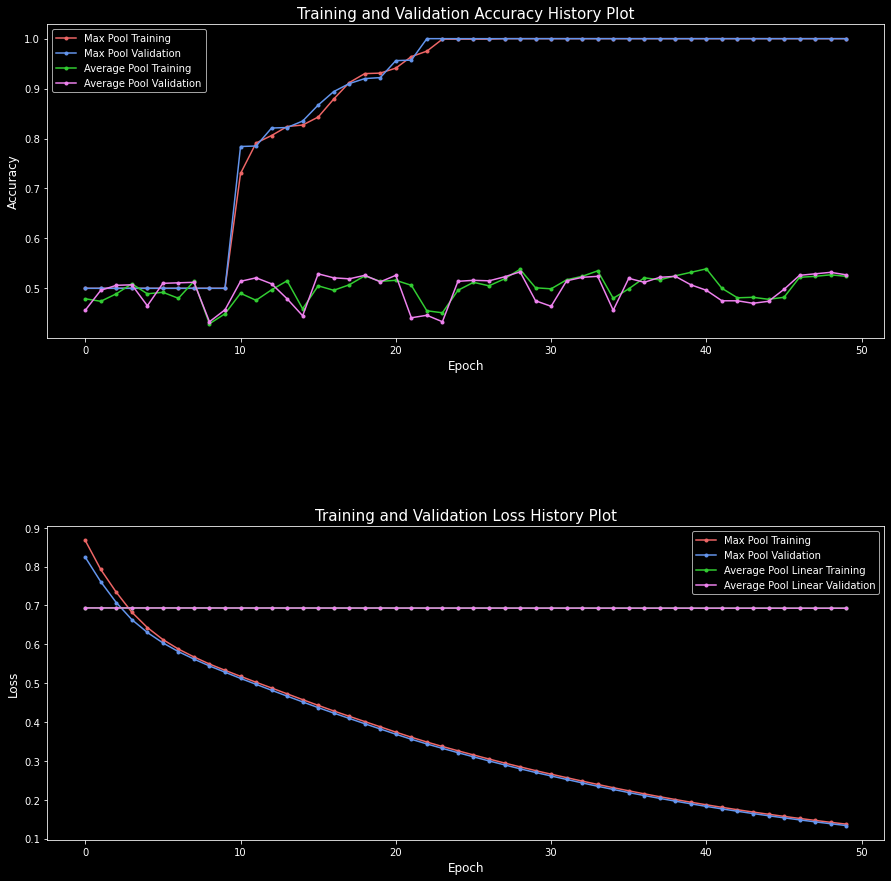

In [35]:
# initialize epoch steps 
epoch_num = np.arange(0,len(history.history['accuracy']))

# set the size and titles of the plot and the axis
fig, (ax1,ax2) = plt.subplots(2,figsize=(15, 15))
plt.subplots_adjust(hspace = 0.6)

# training & validation accuracy history
ax1.set_title("Training and Validation Accuracy History Plot", fontsize = 15) 
ax1.set_xlabel('Epoch', fontsize = 12) # set x-axis title to the kth step in the algorithm
ax1.set_ylabel('Accuracy', fontsize = 12) # set y-axis title to the value of the cost function at the kth step
ax1.plot(epoch_num,history.history['accuracy'], color='#EE6666', marker = '.', label = 'Max Pool Training')
ax1.plot(epoch_num,history.history['val_accuracy'], color='cornflowerblue', marker = '.', label = 'Max Pool Validation')
ax1.plot(epoch_num,history_avg.history['accuracy'], color='limegreen', marker = '.', label = 'Average Pool Training')
ax1.plot(epoch_num,history_avg.history['val_accuracy'], color='violet', marker = '.', label = 'Average Pool Validation')
plt.style.use("dark_background")
ax1.legend()

# training & validation loss history
ax2.set_title("Training and Validation Loss History Plot", fontsize = 15) 
ax2.set_xlabel('Epoch', fontsize = 12) # set x-axis title to the kth step in the algorithm
ax2.set_ylabel('Loss', fontsize = 12) # set y-axis title to the value of the cost function at the kth step
ax2.plot(epoch_num,history.history['loss'], color='#EE6666', marker = '.', label = 'Max Pool Training')
ax2.plot(epoch_num,history.history['val_loss'], color='cornflowerblue', marker = '.', label = 'Max Pool Validation')
ax2.plot(epoch_num,history_avg.history['loss'], color='limegreen', marker = '.', label = 'Average Pool Linear Training')
ax2.plot(epoch_num,history_avg.history['val_loss'], color='violet', marker = '.', label = 'Average Pool Linear Validation')
plt.style.use("dark_background")
ax2.legend()

plt.show()

#### Observations from plot
The average pooling accuracy does not reach 100% accuracy and plateaus at around 50%, somtimes even decreasing, compared to max pooling that does reach 100% at the final epoch. Average pooling results in a constant value for loss, whereas max pooling results in a gradual decrease of loss. 

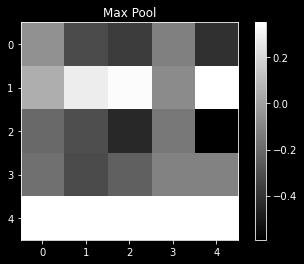

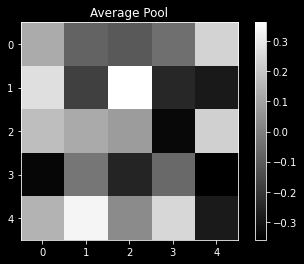

In [36]:
plt.imshow(img,cmap='gray',interpolation = 'nearest') 
plt.title(label = 'Max Pool')
plt.colorbar()
plt.show()

conv_filter_avg=model_avg.get_weights()[0] # extract trained kernel 
img_avg = conv_filter_avg[:,:,0,0] # reshape into 5x5 image
plt.imshow(img_avg,cmap='gray',interpolation = 'nearest')
plt.title(label = 'Average Pool')
plt.colorbar()
plt.show()

#### Observations from kernel plot
The average pool kernel plot does not demonstrate distinct columnar and row-oriented patterns, unlike the max pool kernel which does. Since the kernel plot indicates random patterns, it indicates that average pooling does not optimally distinguish between vertical and horizontal stripes. 

### 3x3 vs. 5x5 vs 10x10 Kernel Sizes 

In [37]:
# create our 3x3 convolution network
model_3 = models.Sequential([
    layers.Conv2D(1,(3,3),activation = 'linear', padding = 'same',input_shape = (50, 50, 1)),
    layers.MaxPool2D(pool_size=50),
    layers.Dense(2, activation='softmax')])

# define our loss function, optimizer, and metrics
model_3.compile(loss="categorical_crossentropy",
    optimizer= "adam",
    metrics=["accuracy"])

# access history 
history_3=model_3.fit(X_train, Y_train,
                  validation_data=(X_val,Y_val),
                  batch_size=64, 
                  epochs=50,
                  verbose=1,
                  shuffle=True)



# create our 10x10 convolution network
model_10 = models.Sequential([
    layers.Conv2D(1,(10,10),activation = 'linear', padding = 'same',input_shape = (50, 50, 1)),
    layers.MaxPool2D(pool_size=50),
    layers.Dense(2, activation='softmax')])

# define our loss function, optimizer, and metrics
model_10.compile(loss="categorical_crossentropy",
    optimizer= "adam",
    metrics=["accuracy"])

# access history 
history_10=model_10.fit(X_train, Y_train,
                  validation_data=(X_val,Y_val),
                  batch_size=64, 
                  epochs=50,
                  verbose=1,
                  shuffle=True)

Epoch 1/50
16/16 [==============================] - 1s 62ms/step - loss: 1.0404 - accuracy: 0.5040 - val_loss: 0.9943 - val_accuracy: 0.5000
Epoch 2/50
16/16 [==============================] - 1s 34ms/step - loss: 0.9768 - accuracy: 0.5021 - val_loss: 0.9360 - val_accuracy: 0.5000
Epoch 3/50
16/16 [==============================] - 1s 39ms/step - loss: 0.9095 - accuracy: 0.5128 - val_loss: 0.8856 - val_accuracy: 0.5000
Epoch 4/50
16/16 [==============================] - 0s 31ms/step - loss: 0.8742 - accuracy: 0.5021 - val_loss: 0.8428 - val_accuracy: 0.5000
Epoch 5/50
16/16 [==============================] - 1s 34ms/step - loss: 0.8272 - accuracy: 0.5124 - val_loss: 0.8063 - val_accuracy: 0.5000
Epoch 6/50
16/16 [==============================] - 0s 30ms/step - loss: 0.7629 - accuracy: 0.5337 - val_loss: 0.7759 - val_accuracy: 0.5000
Epoch 7/50
16/16 [==============================] - 1s 33ms/step - loss: 0.7869 - accuracy: 0.4916 - val_loss: 0.7490 - val_accuracy: 0.5000
Epoch 8/50
16

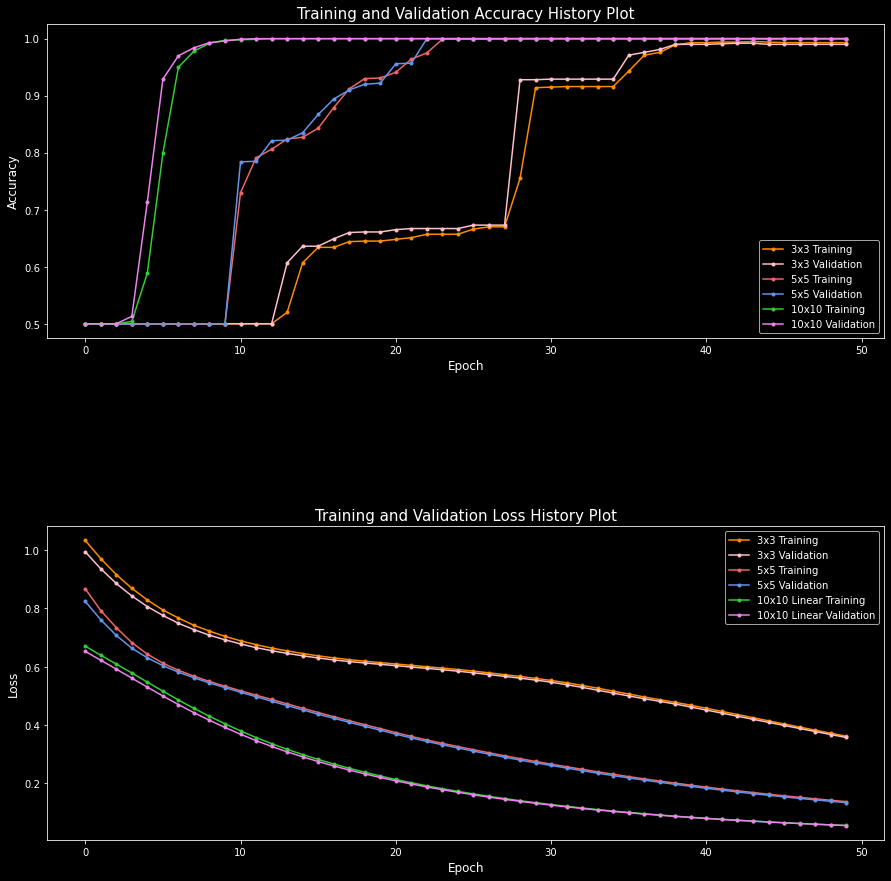

In [38]:
# initialize epoch steps 
epoch_num = np.arange(0,len(history.history['accuracy']))

# set the size and titles of the plot and the axis
fig, (ax1,ax2) = plt.subplots(2,figsize=(15, 15))
plt.subplots_adjust(hspace = 0.6)

# training & validation accuracy history
ax1.set_title("Training and Validation Accuracy History Plot", fontsize = 15) 
ax1.set_xlabel('Epoch', fontsize = 12) # set x-axis title to the kth step in the algorithm
ax1.set_ylabel('Accuracy', fontsize = 12) # set y-axis title to the value of the cost function at the kth step
ax1.plot(epoch_num,history_3.history['accuracy'], color='darkorange', marker = '.', label = '3x3 Training')
ax1.plot(epoch_num,history_3.history['val_accuracy'], color='pink', marker = '.', label = '3x3 Validation')
ax1.plot(epoch_num,history.history['accuracy'], color='#EE6666', marker = '.', label = '5x5 Training')
ax1.plot(epoch_num,history.history['val_accuracy'], color='cornflowerblue', marker = '.', label = '5x5 Validation')
ax1.plot(epoch_num,history_10.history['accuracy'], color='limegreen', marker = '.', label = '10x10 Training')
ax1.plot(epoch_num,history_10.history['val_accuracy'], color='violet', marker = '.', label = '10x10 Validation')
plt.style.use("dark_background")
ax1.legend()

# training & validation loss history
ax2.set_title("Training and Validation Loss History Plot", fontsize = 15) 
ax2.set_xlabel('Epoch', fontsize = 12) # set x-axis title to the kth step in the algorithm
ax2.set_ylabel('Loss', fontsize = 12) # set y-axis title to the value of the cost function at the kth step
ax2.plot(epoch_num,history_3.history['loss'], color='darkorange', marker = '.', label = '3x3 Training')
ax2.plot(epoch_num,history_3.history['val_loss'], color='pink', marker = '.', label = '3x3 Validation')
ax2.plot(epoch_num,history.history['loss'], color='#EE6666', marker = '.', label = '5x5 Training')
ax2.plot(epoch_num,history.history['val_loss'], color='cornflowerblue', marker = '.', label = '5x5 Validation')
ax2.plot(epoch_num,history_10.history['loss'], color='limegreen', marker = '.', label = '10x10 Linear Training')
ax2.plot(epoch_num,history_10.history['val_loss'], color='violet', marker = '.', label = '10x10 Linear Validation')
plt.style.use("dark_background")
ax2.legend()

plt.show()

#### Observations from plot
Increasing the kernel sizes results in reaching 100% accuracy in fewer epochs. The 10x10 kernel reached 100% accuracy at around the 9th epoch, the 5x5 kernel reached 100% accuracy at around the 25th epoch, and the 3x3 kernel did not reach 100% accuracy. Increasing the kernel sizes results in greater reductions in loss. The 10x10 kernel reached around 10% loss, the 5x5 kernel reached around 20% loss, and the 3x3 kernel reached around 50% loss.

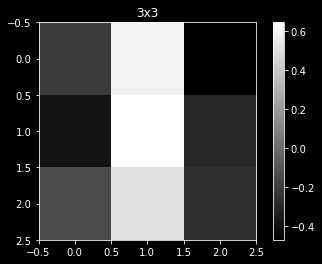

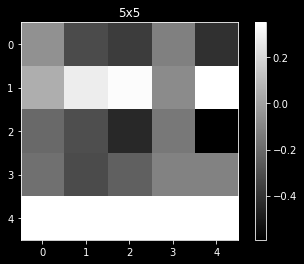

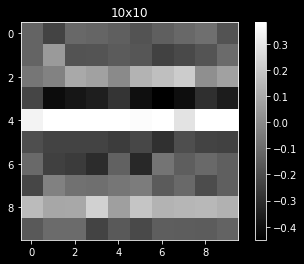

In [39]:
conv_filter_3=model_3.get_weights()[0] # extract trained kernel 
img_3 = conv_filter_3[:,:,0,0] # reshape into 5x5 image
plt.imshow(img_3,cmap='gray',interpolation = 'nearest') 
plt.title(label = '3x3')
plt.colorbar()
plt.show()

plt.imshow(img,cmap='gray',interpolation = 'nearest') 
plt.title(label = '5x5')
plt.colorbar()
plt.show()

conv_filter_10=model_10.get_weights()[0] # extract trained kernel 
img_10 = conv_filter_10[:,:,0,0] # reshape into 5x5 image
plt.imshow(img_10,cmap='gray',interpolation = 'nearest')
plt.title(label = '10x10')
plt.colorbar()
plt.show()

#### Observations from kernel plot 
Increasing the kernel size results in better distinguishing between vertical and horizontal stripes. The 10x10 has the most distinct row patterns compared to the 5x5 and the 3x3. However, all three kernel sizes are able to distinguish between vertical and horizontal stripes as the 3x3 showcases distinct columnar patterns and the 5x5 demonstrates distinct row patterns. 

## Exercise 2 – Non-linear Regression 

In [82]:
csvname ='multiple_sine_waves.csv'
data = np.loadtxt(csvname,delimiter=',')
x = data[:2,:]
y = data[2:,:]

In [83]:
import autograd.numpy as np

def feature_transforms(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return np.sin(a).T

def model(x,w):    
    # feature transformation 
    f = feature_transforms(x,w[0])
    
    # compute linear combination and return
    a = w[1][0] + np.dot(f.T,w[1][1:])
    return a.T

In [84]:
def gradient_descent(g,alpha_choice,max_its,w):
    ''' 

    The standard gradient descent algorithm takes the first derivative or gradient of the function.
    Since the negative gradient is always descending, by evaluating this, the algorithm is able to locally find the minimum of a function.

    Parameters
    -------------

    g : callable 
    input function

    alpha_choice : int or str
    steplength parameter/learning rate

    max_its : int
    maximum number of iterations

    w : array 
    initialization


    Return
    -------------

    weight_history : list
    contains all the weights in the algorithm including the initial

    cost_history : list
    contains the evaluated cost function at the kth step including the starting value

    '''
    # compute gradient module using autograd
    gradient = value_and_grad(g)

    weight_history = [w]     # container for weight history
    cost_history = [g(w)]    # container for corresponding cost function history
    
    for k in range(1,max_its+1): # run the gradient descent loop
        
        # check if alpha is diminishing or fixed
        if alpha_choice == "diminishing":
            alpha = 1/float(k)
        else: 
            alpha = alpha_choice
            
        # compute the value of the function and the gradient at wk
        cost_eval,grad_eval = gradient(w) 

        # take gradient descent step
        w = w - alpha*grad_eval

        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
        
    return weight_history,cost_history




# Least Squares Cost Function for Linear Regression 
def least_squares(w):
    ''' 

    Form a least squares cost function, defined as least_squares, that measures how well a linear model fits our regression data.
    Given a particular choice of parameters, this algorithm will compute the total squared error between the hyperplane and data to find the parameters that minimize this error.

    Parameters
    -------------

    w : vector 
    contains bias & feature-touching weights 


    Return
    -------------

    total squared error :scalar
    error between hyperplane and data 

    '''
    cost = np.sum((model(x,w) - y)**2)
    return cost/float(y.size)

In [85]:
# Set the parameters for our algorithm 
g = least_squares
alpha_choice = 10**(0); w = np.array([0.1*np.random.randn(3,2),0.1*np.random.randn(3,2)]); max_its = 2000;


# Run our algorithm with the defined function to obtain w and cost history 
weight_history,cost_history = gradient_descent(g,alpha_choice,max_its,w)

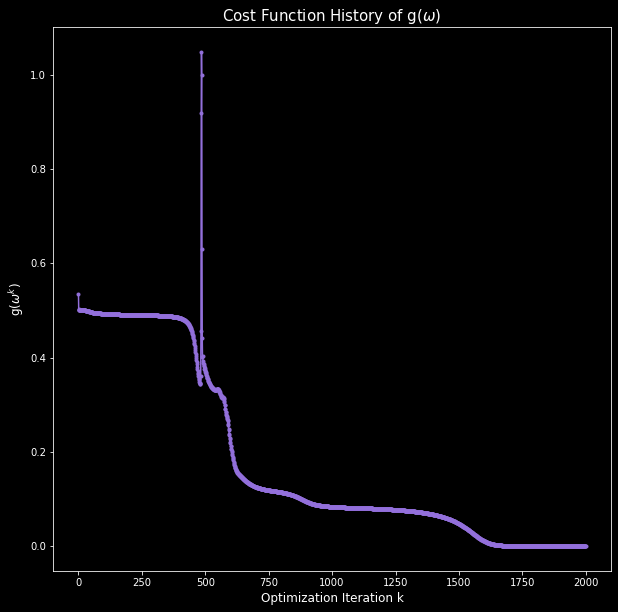

In [86]:
# create an array that is a range from 0 to the number of epochs
step_numbers = np.arange(0, max_its+1) 

# set the size and titles of the plot and the axis
fig, ax = plt.subplots(1,figsize=(10, 10))
plt.subplots_adjust(hspace = 0.6)

ax.set_title("Cost Function History of g($\omega$)", fontsize = 15) 
ax.set_xlabel('Optimization Iteration k', fontsize = 12) # set x-axis title to the kth step in the algorithm
ax.set_ylabel('g($\omega^k$)', fontsize = 12) # set y-axis title to the value of the cost function at the kth step
ax.plot(step_numbers, cost_history, color = 'mediumpurple', marker = '.')
plt.show()


#### Observations from plot
The cost history gradually decreases until around the 500th iteration and then rapidly decreases and spikes up shortly after the 500th iteration and decreases rapidly until the 750th iteration. After this, there is a more gradual decrease in cost until the last iteration.

In [89]:
# find minimum cost
best_ind= np.argmin(cost_history)

# find optimal parameters 
best_w = weight_history[best_ind]

print("These are the optimal parameters:\n",'\033[1m' + str(best_w) + '\033[0m')

These are the optimal parameters:
 [[[-6.28282614e+00 -6.28300645e+00]
  [ 3.65691650e+00  5.75744368e+00]
  [ 8.16927997e+00  5.24753164e+00]]

 [[ 1.00298090e-04  1.76591489e-04]
  [ 1.00091884e+00 -1.26215732e-03]
  [-1.62070982e-03 -9.99378853e-01]]]


## Exercise 3 – Model Tuning

### 3.1 – Observing the Effect of Differing $\alpha$ Values

In [90]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

# alpha = 1
alpha = 1.
model_1 = keras.Sequential([
  layers.Dense(512, activation='relu'),
  layers.Dense(10, activation='softmax')
])
model_1.compile(optimizer=keras.optimizers.RMSprop(alpha),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_1=model_1.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

# alpha = 0.5
alpha = 0.5
model_05 = keras.Sequential([
  layers.Dense(512, activation='relu'),
  layers.Dense(10, activation='softmax')
])
model_05.compile(optimizer=keras.optimizers.RMSprop(alpha),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_05=model_05.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

# alpha = 0.1
alpha = 0.1
model_01 = keras.Sequential([
  layers.Dense(512, activation='relu'),
  layers.Dense(10, activation='softmax')
])
model_01.compile(optimizer=keras.optimizers.RMSprop(alpha),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_01=model_01.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

# alpha = 0.01
alpha = 0.01
model_001 = keras.Sequential([
  layers.Dense(512, activation='relu'),
  layers.Dense(10, activation='softmax')
])
model_001.compile(optimizer=keras.optimizers.RMSprop(alpha),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_001=model_001.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

# alpha = 0.001
alpha = 0.001
model_0001 = keras.Sequential([
  layers.Dense(512, activation='relu'),
  layers.Dense(10, activation='softmax')
])
model_0001.compile(optimizer=keras.optimizers.RMSprop(alpha),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_0001=model_0001.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 10ms/step - loss: 4326.7100 - accuracy: 0.4414 - val_loss: 2.2174 - val_accuracy: 0.2150
Epoch 2/10
375/375 [==============================] - 4s 11ms/step - loss: 3.9911 - accuracy: 0.2306 - val_loss: 2.2234 - val_accuracy: 0.2104
Epoch 3/10
375/375 [==============================] - 3s 9ms/step - loss: 2.7043 - accuracy: 0.2084 - val_loss: 2.5645 - val_accuracy: 0.1958
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 2.6878 - accuracy: 0.1867 - val_loss: 2.7239 - val_accuracy: 0.1863
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3619 - accuracy: 0.1892 - val_loss: 2.1925 - val_accuracy: 0.1813
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 2.4268 - accuracy: 0.1859 - val_loss: 2.2640 - val_accuracy: 0.1723
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 2.2856 - accuracy: 0.1934 - val_loss: 2.1716 - val_accuracy: 0.1895
E

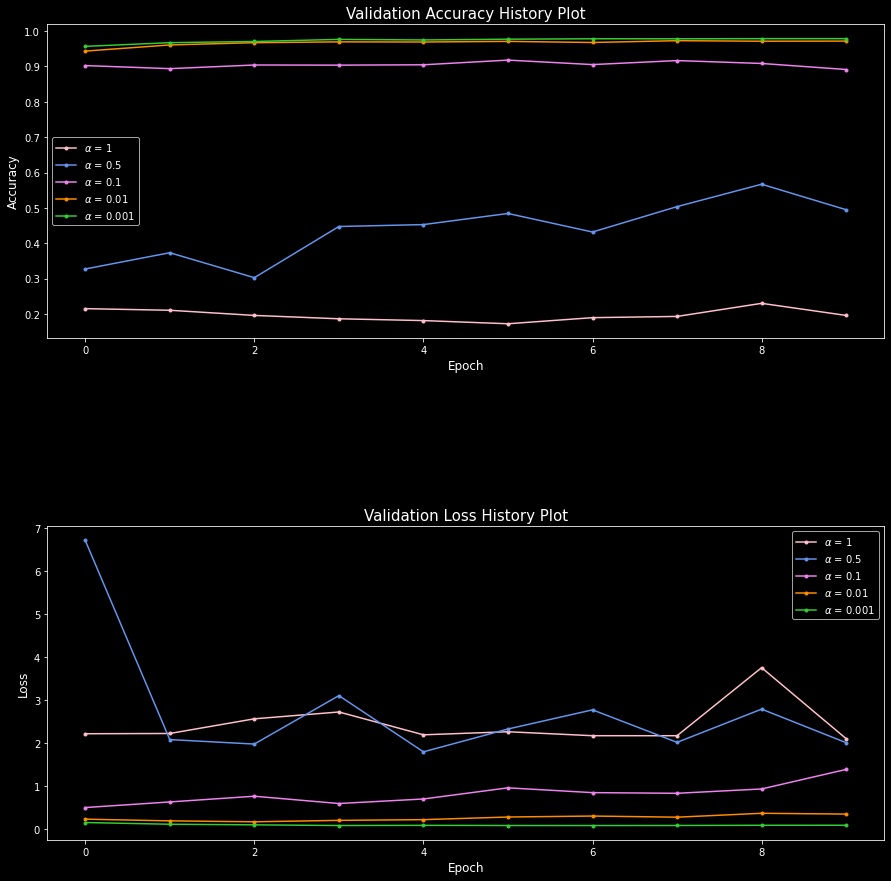

In [91]:
# initialize epoch steps 
epoch_num = np.arange(0,len(history_1.history['val_accuracy']))

# set the size and titles of the plot and the axis
fig, (ax1,ax2) = plt.subplots(2,figsize=(15, 15))
plt.subplots_adjust(hspace = 0.6)

# validation accuracy history
ax1.set_title("Validation Accuracy History Plot", fontsize = 15) 
ax1.set_xlabel('Epoch', fontsize = 12) # set x-axis title to the kth step in the algorithm
ax1.set_ylabel('Accuracy', fontsize = 12) # set y-axis title to the value of the cost function at the kth step
ax1.plot(epoch_num,history_1.history['val_accuracy'], color='pink', marker = '.', label = '$\u03B1$ = 1')
ax1.plot(epoch_num,history_05.history['val_accuracy'], color='cornflowerblue', marker = '.', label = '$\u03B1$ = 0.5')
ax1.plot(epoch_num,history_01.history['val_accuracy'], color='violet', marker = '.', label = '$\u03B1$ = 0.1')
ax1.plot(epoch_num,history_001.history['val_accuracy'], color='darkorange', marker = '.', label = '$\u03B1$ = 0.01')
ax1.plot(epoch_num,history_0001.history['val_accuracy'], color='limegreen', marker = '.', label = '$\u03B1$ = 0.001')
plt.style.use("dark_background")
ax1.legend()

# validation loss history
ax2.set_title("Validation Loss History Plot", fontsize = 15) 
ax2.set_xlabel('Epoch', fontsize = 12) # set x-axis title to the kth step in the algorithm
ax2.set_ylabel('Loss', fontsize = 12) # set y-axis title to the value of the cost function at the kth step
ax2.plot(epoch_num,history_1.history['val_loss'], color='pink', marker = '.', label = '$\u03B1$ = 1')
ax2.plot(epoch_num,history_05.history['val_loss'], color='cornflowerblue', marker = '.', label = '$\u03B1$ = 0.5')
ax2.plot(epoch_num,history_01.history['val_loss'], color='violet', marker = '.', label = '$\u03B1$ = 0.1')
ax2.plot(epoch_num,history_001.history['val_loss'], color='darkorange', marker = '.', label = '$\u03B1$ = 0.01')
ax2.plot(epoch_num,history_0001.history['val_loss'], color='limegreen', marker = '.', label = '$\u03B1$ = 0.001')
plt.style.use("dark_background")
ax2.legend()

plt.show()

#### Observations from the accuracy and loss plots
When we decrease the value of $\alpha$, the starting accuracy increases. At $\alpha$ = 1 the starting accuracy is close to 20%; at $\alpha$ = 0.5 the starting accuracy is close to 30%; at $\alpha$ = 0.1 the starting accuracy is close to 90%; at $\alpha$ = 0.01 the starting accuracy is close to 94%; at $\alpha$ = 0.001 the starting accuracy is close to 96%. The only $\alpha$ value that showcased significant changes in accuracy across the epochs was 0.5 which increased to around 50%, whereas the rest of the $\alpha$ values were relatively constant throughout the epochs. When we decrease the value of $\alpha$, the starting loss generally decreases. At $\alpha$ = 1 the starting loss is close to 2; at $\alpha$ = 0.5 the starting loss is close to 7; at $\alpha$ = 0.1 the starting loss is close to 0.8; at $\alpha$ = 0.01 the starting loss is close to 0.3; at $\alpha$ = 0.001 the starting loss is close to 0.1. The first loss value of $\alpha$ = 1 is around 2 which is greater than the three lowest $\alpha$ values but smaller than $\alpha$ = 0.5. This could indicate that the loss behaviour greatly varies with the values of $\alpha$ and that the smaller the value, the better the optimization.  

### 3.2 – Logistic Regression on MNIST Data

In [92]:
model = keras.Sequential([layers.Dense(10, activation='softmax')])
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=50,
    batch_size=128,
    validation_split=0.2)

Epoch 1/50
375/375 [==============================] - 1s 3ms/step - loss: 1.0865 - accuracy: 0.7117 - val_loss: 0.3602 - val_accuracy: 0.9025
Epoch 2/50
375/375 [==============================] - 1s 2ms/step - loss: 0.3675 - accuracy: 0.8984 - val_loss: 0.3069 - val_accuracy: 0.9148
Epoch 3/50
375/375 [==============================] - 1s 2ms/step - loss: 0.3219 - accuracy: 0.9108 - val_loss: 0.2893 - val_accuracy: 0.9199
Epoch 4/50
375/375 [==============================] - 1s 2ms/step - loss: 0.2978 - accuracy: 0.9170 - val_loss: 0.2823 - val_accuracy: 0.9208
Epoch 5/50
375/375 [==============================] - 1s 2ms/step - loss: 0.2905 - accuracy: 0.9188 - val_loss: 0.2755 - val_accuracy: 0.9232
Epoch 6/50
375/375 [==============================] - 1s 2ms/step - loss: 0.2813 - accuracy: 0.9222 - val_loss: 0.2728 - val_accuracy: 0.9237
Epoch 7/50
375/375 [==============================] - 1s 3ms/step - loss: 0.2751 - accuracy: 0.9236 - val_loss: 0.2686 - val_accuracy: 0.9282
Epoch 

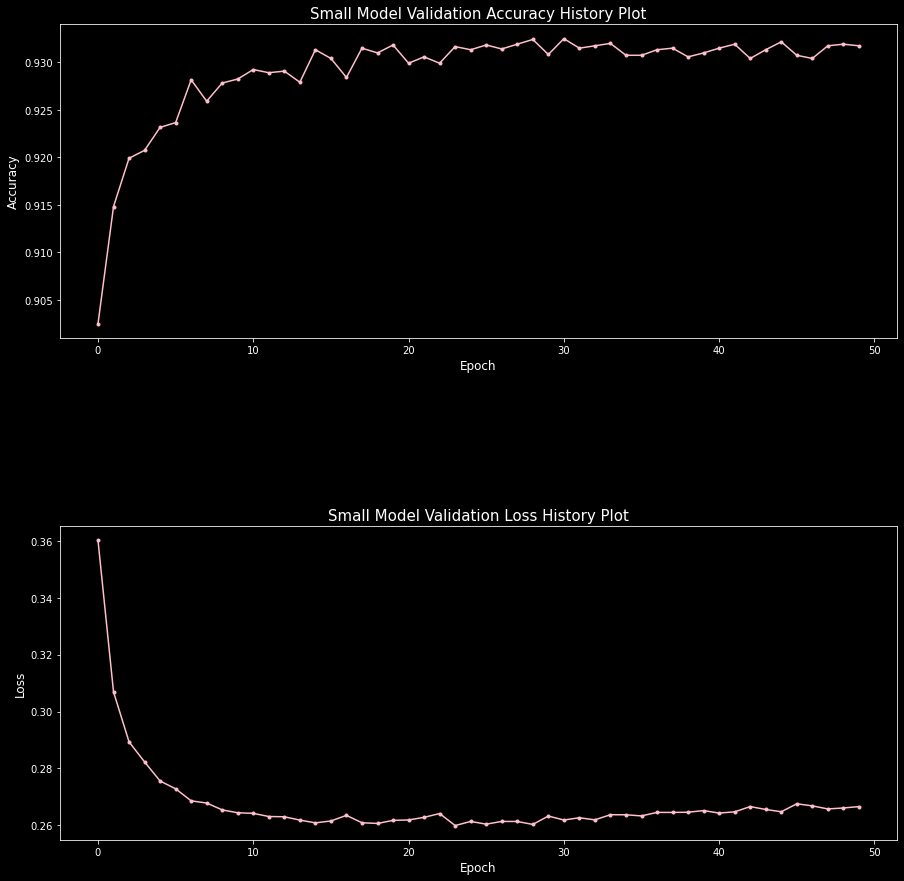

In [93]:
# initialize epoch steps 
epoch_num = np.arange(0,len(history_small_model.history['val_accuracy']))

# set the size and titles of the plot and the axis
fig, (ax1,ax2) = plt.subplots(2,figsize=(15, 15))
plt.subplots_adjust(hspace = 0.6)

# validation accuracy history
ax1.set_title("Small Model Validation Accuracy History Plot", fontsize = 15) 
ax1.set_xlabel('Epoch', fontsize = 12) # set x-axis title to the kth step in the algorithm
ax1.set_ylabel('Accuracy', fontsize = 12) # set y-axis title to the value of the cost function at the kth step
ax1.plot(epoch_num,history_small_model.history['val_accuracy'], color='pink', marker = '.')
plt.style.use("dark_background")

# validation loss history
ax2.set_title("Small Model Validation Loss History Plot", fontsize = 15) 
ax2.set_xlabel('Epoch', fontsize = 12) # set x-axis title to the kth step in the algorithm
ax2.set_ylabel('Loss', fontsize = 12) # set y-axis title to the value of the cost function at the kth step
ax2.plot(epoch_num,history_small_model.history['val_loss'], color='pink', marker = '.')
plt.style.use("dark_background")

plt.show()

#### Observations from plot
Both the accuracy and loss plots change rapidly within the first 20 epochs and gradually plateau until the last epoch. There is no clear minimum in the validation loss that indicates when we start to overfit the data. However, the loss may have had gradually increased after the 30th epoch, but there is no significant indication. 

### 3.3 – Addition of Layers in Our Model

In [94]:
model = keras.Sequential([
  layers.Dense(96, activation='relu'),
  layers.Dense(96, activation='relu'),
  layers.Dense(10, activation='softmax'),
])
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=50,
    batch_size=128,
    validation_split=0.2)

Epoch 1/50
375/375 [==============================] - 2s 4ms/step - loss: 0.6014 - accuracy: 0.8348 - val_loss: 0.1837 - val_accuracy: 0.9452
Epoch 2/50
375/375 [==============================] - 1s 4ms/step - loss: 0.1725 - accuracy: 0.9489 - val_loss: 0.1287 - val_accuracy: 0.9607
Epoch 3/50
375/375 [==============================] - 1s 4ms/step - loss: 0.1154 - accuracy: 0.9661 - val_loss: 0.1263 - val_accuracy: 0.9629
Epoch 4/50
375/375 [==============================] - 1s 3ms/step - loss: 0.0902 - accuracy: 0.9735 - val_loss: 0.1096 - val_accuracy: 0.9671
Epoch 5/50
375/375 [==============================] - 1s 4ms/step - loss: 0.0684 - accuracy: 0.9789 - val_loss: 0.1023 - val_accuracy: 0.9691
Epoch 6/50
375/375 [==============================] - 1s 3ms/step - loss: 0.0530 - accuracy: 0.9847 - val_loss: 0.0902 - val_accuracy: 0.9737
Epoch 7/50
375/375 [==============================] - 1s 4ms/step - loss: 0.0444 - accuracy: 0.9866 - val_loss: 0.1013 - val_accuracy: 0.9717
Epoch 

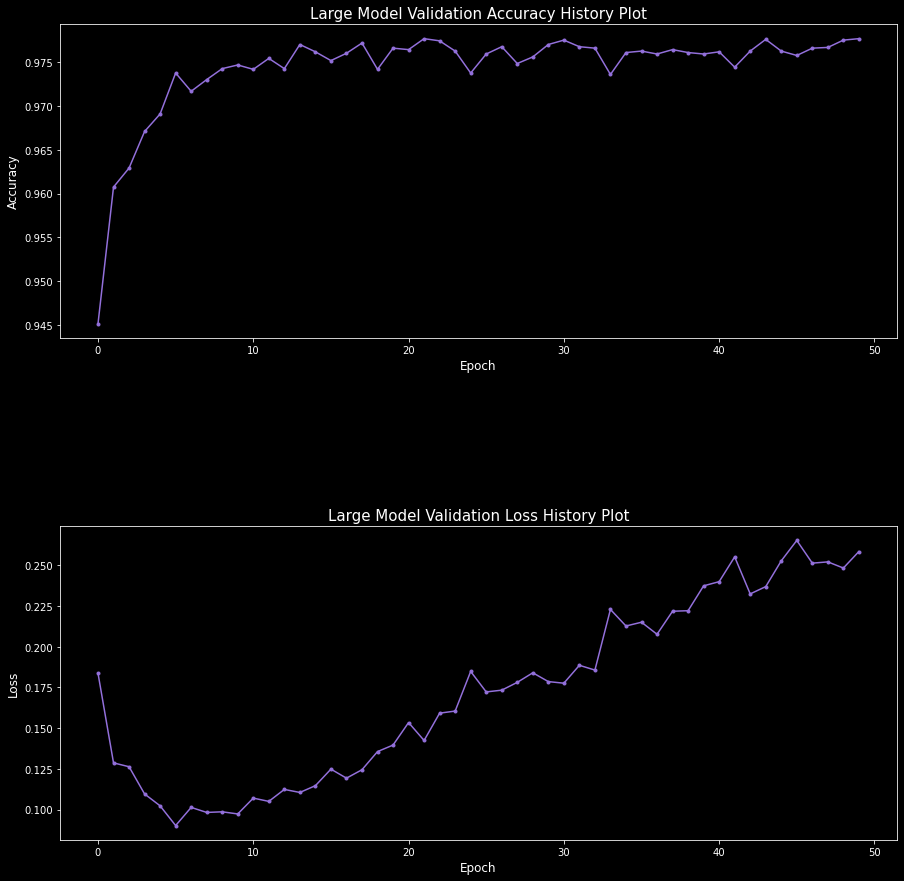

In [95]:
# initialize epoch steps 
epoch_num = np.arange(0,len(history_large_model.history['val_accuracy']))

# set the size and titles of the plot and the axis
fig, (ax1,ax2) = plt.subplots(2,figsize=(15, 15))
plt.subplots_adjust(hspace = 0.6)

# validation accuracy history
ax1.set_title("Large Model Validation Accuracy History Plot", fontsize = 15) 
ax1.set_xlabel('Epoch', fontsize = 12) # set x-axis title to the kth step in the algorithm
ax1.set_ylabel('Accuracy', fontsize = 12) # set y-axis title to the value of the cost function at the kth step
ax1.plot(epoch_num,history_large_model.history['val_accuracy'], color='mediumpurple', marker = '.')
plt.style.use("dark_background")

# validation loss history
ax2.set_title("Large Model Validation Loss History Plot", fontsize = 15) 
ax2.set_xlabel('Epoch', fontsize = 12) # set x-axis title to the kth step in the algorithm
ax2.set_ylabel('Loss', fontsize = 12) # set y-axis title to the value of the cost function at the kth step
ax2.plot(epoch_num,history_large_model.history['val_loss'], color='mediumpurple', marker = '.')
plt.style.use("dark_background")

plt.show()

#### Observations from plot
The accuracy plot changed rapidly within the first 10 epochs and slightly varied at a range until the last epoch. The loss plot decreased rapidly at the start to the 5th epoch and then gradually increased until the last epoch. There is a clear minimum in the validation loss that indicates when we start to overfit the data. This occured at around the 5th epoch where the loss value significantly increased from around 0.1 to 0.250 at the last epoch. The 5th epoch is potentially the point where we start to overfit our data and the region is from the 5th to 50th epoch. 

## Exercise 4 – Boosting Tree Regression

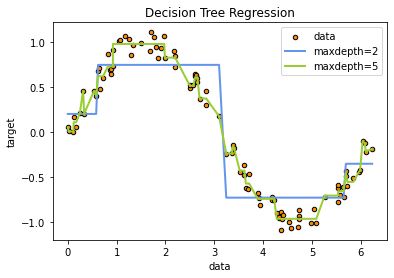

In [14]:
import numpy as np

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(6.3 * rng.rand(100, 1), axis=0)
y = np.sin(X).ravel()
y += 0.3 * (0.5 - rng.rand(len(X)))
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X, y_1, color="cornflowerblue",
         label="maxdepth=2", linewidth=2)
plt.plot(X, y_2, color="yellowgreen", label="maxdepth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [15]:
def My_TreeRegressor(y,il,ir,max_depth,level=0):
    ''' 

    The tree regressor attempts to create a best fitting plot given a set of data points
    First, we generate candidate split points by recording every mid-point value between x along each dimension
    Then for each candidate split, generate optimal leaf nodes and then find find the best stump (with optimal s and v) that provides lowest cost value  

    Parameters
    -------------

    y : array 
    prediction values 

    il : int
    left indices 

    ir : int
    right indices 

    max_depth : int 
    maximum depth level


    Return
    -------------

    yreg : array
    contains all the regression points


    '''
    global yreg
    if (level==0): yreg=np.zeros(len(y))
    if level == max_depth or il == ir -1:
        return yreg
    
    least_square_cost = []
    for i in range(il+1, ir): # create indices to generate candidate split points

    # generate leaf nodes & least squares cost value
        y_left_vals = y[il:i]
        v_left = np.mean(y_left_vals) 

        y_right_vals = y[i:ir]
        v_right = np.mean(y_right_vals)

        left_cost = (np.sum((v_left - y_left_vals)**2))
        right_cost = (np.sum((v_right - y_right_vals)**2))
        least_square_cost += [left_cost + right_cost]

    # obtain optimal split point
    s_final = np.argmin(least_square_cost) + il
    v_left_final = y[il:s_final]
    v_right_final = y[s_final:ir]
    
    # update regression array
    yreg[il:s_final+1] = np.mean(v_left_final)
    yreg[s_final:ir] = np.mean(v_right_final)
    My_TreeRegressor(y,il,s_final+1, max_depth, level = level +1)
    My_TreeRegressor(y,s_final+1, ir, max_depth, level = level +1)
    
    return yreg
    

In [16]:
# run our parameters for our algorithm
Depth_2_reg = My_TreeRegressor(y,0,len(y),max_depth = 2)
Depth_5_reg = My_TreeRegressor(y,0,len(y),max_depth = 5)

/Users/christedmoreno/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/christedmoreno/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


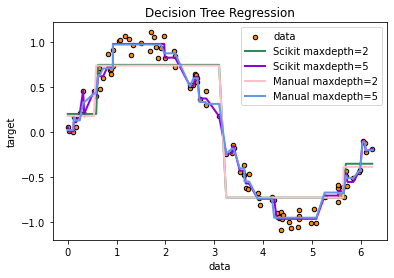

In [17]:
# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X, y_1, color="seagreen",
         label="Scikit maxdepth=2", linewidth=2)
plt.plot(X, y_2, color="darkviolet", label="Scikit maxdepth=5", linewidth=2)
plt.plot(X, Depth_2_reg, color="pink", label="Manual maxdepth=2", linewidth=2)
plt.plot(X, Depth_5_reg, color="cornflowerblue", label="Manual maxdepth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

#### Observations from the plot
When comparing the Scikit plot to the manual decision tree regression plot, the plots agree quite well. There are some instances where the manual decision tree plot does not completely overlap with the scikit plot (this feature is more obvious when comparing at maxdepth = 5 where the little peaks in scikit are not overlapped with the deviations from the manual plot). The maxdepth = 2 agrees very well between the manual and scikit as there is a very minimal deviation between the two. 